# Optimization: principles and algorithms

Bierlaire, M. (2015). *Optimization: Principles and Algorithms.* EPFL Press.

# Chapter 23: Shortest paths

This notebook replicates the examples from the book, using the python package optimization_book. The numbering of the algorithms, tables and page refer to the book.

In [1]:
import numpy as np
import inspect
import matplotlib.pyplot as plt
import optimization_book.networks as net
import optimization_book.exceptions as excep

Network fron Figure 23.1. Note that the node names have exactly two characters. Therefore, the first node's name is ' 1', with a blank space before the '1'.

In [2]:
all_nodes = []
number = 0
for row in range(4):
    for col in range(4):
        number += 1
        x = col
        y = 3 - row
        all_nodes.append(net.Node(f'{number:2}', x, y))     

In [3]:
arcs = [
    net.Arc(all_nodes[0], all_nodes[1], 8),
    net.Arc(all_nodes[0], all_nodes[4], 1),
    net.Arc(all_nodes[1], all_nodes[2], 1),
    net.Arc(all_nodes[2], all_nodes[3], 1),
    net.Arc(all_nodes[3], all_nodes[7], 1),
    net.Arc(all_nodes[4], all_nodes[5], 8),
    net.Arc(all_nodes[4], all_nodes[8], 1),
    net.Arc(all_nodes[5], all_nodes[1], 1),
    net.Arc(all_nodes[5], all_nodes[6], 8),
    net.Arc(all_nodes[6], all_nodes[2], 8),
    net.Arc(all_nodes[6], all_nodes[7], 8),
    net.Arc(all_nodes[7], all_nodes[11], 1),
    net.Arc(all_nodes[8], all_nodes[9], 8),
    net.Arc(all_nodes[8], all_nodes[12], 1),
    net.Arc(all_nodes[9], all_nodes[5], 1),
    net.Arc(all_nodes[9], all_nodes[10], 8),
    net.Arc(all_nodes[10], all_nodes[6], 8),
    net.Arc(all_nodes[10], all_nodes[11], 8),
    net.Arc(all_nodes[11], all_nodes[15], 1),
    net.Arc(all_nodes[12], all_nodes[13], 1),
    net.Arc(all_nodes[13], all_nodes[9], 1),
    net.Arc(all_nodes[13], all_nodes[14], 8),
    net.Arc(all_nodes[14], all_nodes[10], 8),
    net.Arc(all_nodes[14], all_nodes[15], 8),
]

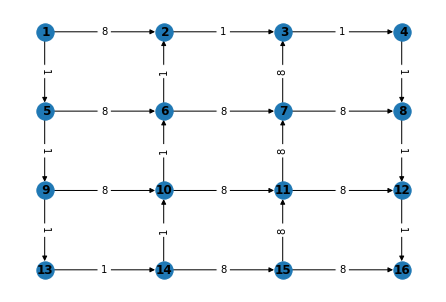

In [4]:
network_231 = net.Network(arcs)
network_231.draw()

Path enumeration: Table 23.1

In [5]:
net.path_enumeration(network_231, ' 1', '16')

[ 1 ->  2 ->  3 ->  4 ->  8 -> 12 -> 16 [Cost: 13],
  1 ->  5 ->  6 ->  2 ->  3 ->  4 ->  8 -> 12 -> 16 [Cost: 15],
  1 ->  5 ->  6 ->  7 ->  3 ->  4 ->  8 -> 12 -> 16 [Cost: 29],
  1 ->  5 ->  6 ->  7 ->  8 -> 12 -> 16 [Cost: 27],
  1 ->  5 ->  9 -> 10 ->  6 ->  2 ->  3 ->  4 ->  8 -> 12 -> 16 [Cost: 17],
  1 ->  5 ->  9 -> 10 ->  6 ->  7 ->  3 ->  4 ->  8 -> 12 -> 16 [Cost: 31],
  1 ->  5 ->  9 -> 10 ->  6 ->  7 ->  8 -> 12 -> 16 [Cost: 29],
  1 ->  5 ->  9 -> 10 -> 11 ->  7 ->  3 ->  4 ->  8 -> 12 -> 16 [Cost: 38],
  1 ->  5 ->  9 -> 10 -> 11 ->  7 ->  8 -> 12 -> 16 [Cost: 36],
  1 ->  5 ->  9 -> 10 -> 11 -> 12 -> 16 [Cost: 27],
  1 ->  5 ->  9 -> 13 -> 14 -> 10 ->  6 ->  2 ->  3 ->  4 ->  8 -> 12 -> 16 [Cost: 12],
  1 ->  5 ->  9 -> 13 -> 14 -> 10 ->  6 ->  7 ->  3 ->  4 ->  8 -> 12 -> 16 [Cost: 26],
  1 ->  5 ->  9 -> 13 -> 14 -> 10 ->  6 ->  7 ->  8 -> 12 -> 16 [Cost: 24],
  1 ->  5 ->  9 -> 13 -> 14 -> 10 -> 11 ->  7 ->  3 ->  4 ->  8 -> 12 -> 16 [Cost: 33],
  1 ->  5 ->  9 -> 1

Calculation of the shortest path.

In [6]:
the_algorithm = net.ShortestPathAlgorithm(network_231, ' 1')

In [7]:
the_algorithm.run()

In [8]:
the_algorithm.print_results()

Label of node  1: 0. Incoming arc: None
Label of node 12: 11. Incoming arc:  8 -> 12
Label of node 11: 13. Incoming arc: 10 -> 11
Label of node  4: 9. Incoming arc:  3 ->  4
Label of node 15: 12. Incoming arc: 14 -> 15
Label of node  8: 10. Incoming arc:  4 ->  8
Label of node 14: 4. Incoming arc: 13 -> 14
Label of node  5: 1. Incoming arc:  1 ->  5
Label of node  7: 14. Incoming arc:  6 ->  7
Label of node  6: 6. Incoming arc: 10 ->  6
Label of node  2: 7. Incoming arc:  6 ->  2
Label of node 13: 3. Incoming arc:  9 -> 13
Label of node 10: 5. Incoming arc: 14 -> 10
Label of node 16: 12. Incoming arc: 12 -> 16
Label of node  3: 8. Incoming arc:  2 ->  3
Label of node  9: 2. Incoming arc:  5 ->  9


In [9]:
theShortestPathTree = the_algorithm.shortest_path_tree()

Figure 23.3: shortest path tree

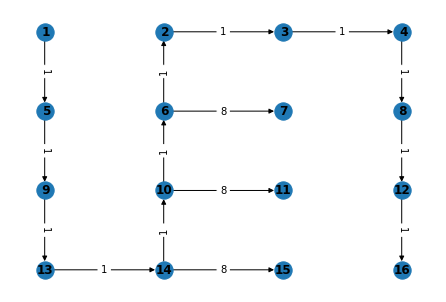

In [10]:
theShortestPathTree.draw()

The details of the iterations are reported below. The following table is the equivalent of Table 23.2 in the book. Note that it is not identical because there is no rule about the choice of the node selected at each iteration. But the algorithm has converged to the exact same solution.

In [11]:
the_algorithm.iterations

,Iter.,Set,Node,ell_ 1,ell_ 2,ell_ 3,ell_ 4,ell_ 5,ell_ 6,ell_ 7,ell_ 8,ell_ 9,ell_10,ell_11,ell_12,ell_13,ell_14,ell_15,ell_16
0,0,{ 1},1,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1,1,"{ 2, 5}",5,0,8.0,inf,inf,1.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,2,"{ 2, 6, 9}",2,0,8.0,inf,inf,1.0,9.0,inf,inf,2.0,inf,inf,inf,inf,inf,inf,inf
3,3,"{ 3, 6, 9}",6,0,8.0,9.0,inf,1.0,9.0,inf,inf,2.0,inf,inf,inf,inf,inf,inf,inf
4,4,"{ 3, 7, 9}",9,0,8.0,9.0,inf,1.0,9.0,17.0,inf,2.0,inf,inf,inf,inf,inf,inf,inf
5,5,"{ 3, 7, 10, 13}",7,0,8.0,9.0,inf,1.0,9.0,17.0,inf,2.0,10.0,inf,inf,3.0,inf,inf,inf
6,6,"{ 3, 8, 10, 13}",13,0,8.0,9.0,inf,1.0,9.0,17.0,25.0,2.0,10.0,inf,inf,3.0,inf,inf,inf
7,7,"{ 3, 8, 10, 14}",3,0,8.0,9.0,inf,1.0,9.0,17.0,25.0,2.0,10.0,inf,inf,3.0,4.0,inf,inf
8,8,"{ 4, 8, 10, 14}",14,0,8.0,9.0,10.0,1.0,9.0,17.0,25.0,2.0,10.0,inf,inf,3.0,4.0,inf,inf
9,9,"{ 4, 8, 10, 15}",10,0,8.0,9.0,10.0,1.0,9.0,17.0,25.0,2.0,5.0,inf,inf,3.0,4.0,12.0,inf


The following table is the equivalent of Table 23.3 in the book. Again, it is not identical because there is no rule about the choice of the node selected at each iteration.

In [12]:
the_algorithm.pi

,Iter.,pi_ 1,pi_ 2,pi_ 3,pi_ 4,pi_ 5,pi_ 6,pi_ 7,pi_ 8,pi_ 9,pi_10,pi_11,pi_12,pi_13,pi_14,pi_15,pi_16
0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,2,-1,-1,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,2,-1,2,-1,-1,5,6,-1,-1,9,-1,-1,-1,-1,-1,-1,-1
3,3,-1,2,3,-1,5,6,-1,-1,9,-1,-1,-1,-1,-1,-1,-1
4,4,-1,2,3,-1,5,6,7,-1,9,-1,-1,-1,-1,-1,-1,-1
5,5,-1,2,3,-1,5,6,7,-1,9,10,-1,-1,13,-1,-1,-1
6,6,-1,2,3,-1,5,6,7,8,9,10,-1,-1,13,-1,-1,-1
7,7,-1,2,3,-1,5,6,7,8,9,10,-1,-1,13,14,-1,-1
8,8,-1,2,3,4,5,6,7,8,9,10,-1,-1,13,14,-1,-1
9,9,-1,2,3,4,5,6,7,8,9,10,-1,-1,13,14,15,-1


Dikstra's algorithm

In [13]:
the_algorithm = net.ShortestPathAlgorithm(network_231, ' 1', dijkstra=True)

In [14]:
the_algorithm.run()

In [15]:
the_algorithm.print_results()

Label of node  1: 0. Incoming arc: None
Label of node 12: 11. Incoming arc:  8 -> 12
Label of node 11: 13. Incoming arc: 10 -> 11
Label of node  4: 9. Incoming arc:  3 ->  4
Label of node 15: 12. Incoming arc: 14 -> 15
Label of node  8: 10. Incoming arc:  4 ->  8
Label of node 14: 4. Incoming arc: 13 -> 14
Label of node  5: 1. Incoming arc:  1 ->  5
Label of node  7: 14. Incoming arc:  6 ->  7
Label of node  6: 6. Incoming arc: 10 ->  6
Label of node  2: 7. Incoming arc:  6 ->  2
Label of node 13: 3. Incoming arc:  9 -> 13
Label of node 10: 5. Incoming arc: 14 -> 10
Label of node 16: 12. Incoming arc: 12 -> 16
Label of node  3: 8. Incoming arc:  2 ->  3
Label of node  9: 2. Incoming arc:  5 ->  9


The details of the iterations are reported below. The following table is the equivalent of Table 23.4 in the book. 

In [16]:
the_algorithm.iterations

,Iter.,Set,Node,ell_ 1,ell_ 2,ell_ 3,ell_ 4,ell_ 5,ell_ 6,ell_ 7,ell_ 8,ell_ 9,ell_10,ell_11,ell_12,ell_13,ell_14,ell_15,ell_16
0,0,{ 1},1,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1,1,"{ 2, 5}",5,0,8.0,inf,inf,1.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,2,"{ 2, 6, 9}",9,0,8.0,inf,inf,1.0,9.0,inf,inf,2.0,inf,inf,inf,inf,inf,inf,inf
3,3,"{ 2, 6, 10, 13}",13,0,8.0,inf,inf,1.0,9.0,inf,inf,2.0,10.0,inf,inf,3.0,inf,inf,inf
4,4,"{ 2, 6, 10, 14}",14,0,8.0,inf,inf,1.0,9.0,inf,inf,2.0,10.0,inf,inf,3.0,4.0,inf,inf
5,5,"{ 2, 6, 10, 15}",10,0,8.0,inf,inf,1.0,9.0,inf,inf,2.0,5.0,inf,inf,3.0,4.0,12.0,inf
6,6,"{ 2, 6, 11, 15}",6,0,8.0,inf,inf,1.0,6.0,inf,inf,2.0,5.0,13.0,inf,3.0,4.0,12.0,inf
7,7,"{ 2, 7, 11, 15}",2,0,7.0,inf,inf,1.0,6.0,14.0,inf,2.0,5.0,13.0,inf,3.0,4.0,12.0,inf
8,8,"{ 3, 7, 11, 15}",3,0,7.0,8.0,inf,1.0,6.0,14.0,inf,2.0,5.0,13.0,inf,3.0,4.0,12.0,inf
9,9,"{ 4, 7, 11, 15}",4,0,7.0,8.0,9.0,1.0,6.0,14.0,inf,2.0,5.0,13.0,inf,3.0,4.0,12.0,inf


The following table is the equivalent of Table 23.5

In [17]:
the_algorithm.pi

,Iter.,pi_ 1,pi_ 2,pi_ 3,pi_ 4,pi_ 5,pi_ 6,pi_ 7,pi_ 8,pi_ 9,pi_10,pi_11,pi_12,pi_13,pi_14,pi_15,pi_16
0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,2,-1,-1,5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,2,-1,2,-1,-1,5,6,-1,-1,9,-1,-1,-1,-1,-1,-1,-1
3,3,-1,2,-1,-1,5,6,-1,-1,9,10,-1,-1,13,-1,-1,-1
4,4,-1,2,-1,-1,5,6,-1,-1,9,10,-1,-1,13,14,-1,-1
5,5,-1,2,-1,-1,5,6,-1,-1,9,10,-1,-1,13,14,15,-1
6,6,-1,2,-1,-1,5,6,-1,-1,9,10,11,-1,13,14,15,-1
7,7,-1,2,-1,-1,5,6,7,-1,9,10,11,-1,13,14,15,-1
8,8,-1,2,3,-1,5,6,7,-1,9,10,11,-1,13,14,15,-1
9,9,-1,2,3,4,5,6,7,-1,9,10,11,-1,13,14,15,-1


The longest path algorithm: project organization example

In [18]:
no = net.Node('o', 0, 0)
n1 = net.Node('1', 1, 0)
n2 = net.Node('2', 2, 1)
n3 = net.Node('3', 2, 0)
n4 = net.Node('4', 3, 0)
n5 = net.Node('5', 3, 1)
n6 = net.Node('6', 2, -1)
n7 = net.Node('7', 4, 1)
n8 = net.Node('8', 3, -1)
n9 = net.Node('9', 5, 1)
n10 = net.Node('10', 4, -1)
n11 = net.Node('11', 5, 0)
n12 = net.Node('12', 6, 0)
n13 = net.Node('13', 6, -1)
nd = net.Node('d', 7, 0)

In [19]:
arcs = [
    net.Arc(no, n1, 0),
    net.Arc(n1, n2, 1),
    net.Arc(n1, n3, 1),
    net.Arc(n2, n3, 1),
    net.Arc(n2, n5, 1),
    net.Arc(n3, n4, 3),
    net.Arc(n3, n6, 3),
    net.Arc(n4, n7, 3),
    net.Arc(n5, n7, 2),
    net.Arc(n6, n4, 5),
    net.Arc(n6, n8, 5),
    net.Arc(n7, n9, 5),
    net.Arc(n8, n10, 6),
    net.Arc(n9, n11, 1),
    net.Arc(n10, n11, 2), 
    net.Arc(n10, n13, 2),
    net.Arc(n11, n12, 3),
    net.Arc(n12, nd, 2),
    net.Arc(n13, nd, 1),
]

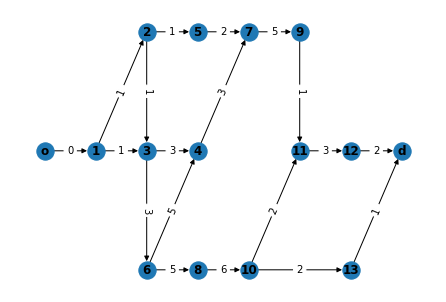

In [20]:
network_235 = net.Network(arcs)
network_235.draw()

In [21]:
the_algorithm = net.LongestPathAlgorithm(network_235, 'o')

In [22]:
the_algorithm.run()

The results of the algorithm, as provided in Table 23.7.

In [23]:
the_algorithm.print_results()

Label of node 12: -22. Incoming arc: 11 -> 12
Label of node 7: -13. Incoming arc: 4 -> 7
Label of node d: -24. Incoming arc: 12 -> d
Label of node 6: -5. Incoming arc: 3 -> 6
Label of node 1: 0. Incoming arc: o -> 1
Label of node 3: -2. Incoming arc: 2 -> 3
Label of node 2: -1. Incoming arc: 1 -> 2
Label of node 4: -10. Incoming arc: 6 -> 4
Label of node 13: -18. Incoming arc: 10 -> 13
Label of node 8: -10. Incoming arc: 6 -> 8
Label of node o: 0. Incoming arc: None
Label of node 11: -19. Incoming arc: 9 -> 11
Label of node 5: -2. Incoming arc: 2 -> 5
Label of node 9: -18. Incoming arc: 7 -> 9
Label of node 10: -16. Incoming arc: 8 -> 10


In [24]:
n1 = net.Node('n1', 0, 0)
n2 = net.Node('n2', 0, 1)
n3 = net.Node('n3', 1, 0)

In [25]:
arcs = [
    net.Arc(n1, n2, -1),
    net.Arc(n2, n3, -1),
    net.Arc(n3, n1, -1),
]

In [26]:
debug_net = net.Network(arcs)

In [27]:
algo = net.ShortestPathAlgorithm(debug_net, 'n1')

In [28]:
algo.run()

The label of node n1 is -3, that is below the lower bound -2. It is an unbounded problem.
